In [12]:
#Importando as bibliotecas
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
import openpyxl
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication

In [13]:
#Pegar os dados do YFinance
codigos_de_negociacao = ["^BVSP", "BRL=X"]  

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close               Close                High            \
               BRL=X     ^BVSP     BRL=X     ^BVSP     BRL=X     ^BVSP   
Date                                                                     
2022-02-11  5.248700  113572.0  5.248700  113572.0  5.251200  114899.0   
2022-02-14  5.249956  113807.0  5.249956  113807.0  5.263300  114167.0   
2022-02-15  5.214000  114660.0  5.214000  114660.0  5.219900  114819.0   
2022-02-16  5.157900  115181.0  5.157900  115181.0  5.184725  115734.0   
2022-02-17  5.135800  113528.0  5.135800  113528.0  5.180000  115214.0   
...              ...       ...       ...       ...       ...       ...   
2023-02-06  5.149800  108456.0  5.149800  108456.0  5.206000  108710.0   
2023-02-07  5.145700  107920.0  5.145700  107920.0  5.205700  109037.0   
2023-02-08  5.209300  109882.0  5.209300  109882.0  5.240100  110175.0   
2023-02-09  5.199500  107783.0  5.199500  107783.0  5.274000  110046.0   
2023-02-10  5.289500  108150.0  5.289500  108150.0  5.304566  108647.0   

                 Low                Open           Volume              
               BRL=X     ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                   
2022-02-11  5.182800  113128.0  5.248600  113368.0      0  18602800.0  
2022-02-14  5.195300  113358.0  5.250500  113643.0      0  10757600.0  
2022-02-15  5.166288  113882.0  5.213700  113905.0      0  11649600.0  
2022-02-16  5.143800  114816.0  5.158000  114830.0      0  12052100.0  
2022-02-17  5.121471  113389.0  5.133567  115181.0      0  10807500.0  
...              ...       ...       ...       ...    ...         ...  
2023-02-06  5.147992  107416.0  5.149800  108518.0      0  11514600.0  
2023-02-07  5.133384  107234.0  5.145700  108727.0      0  12956300.0  
2023-02-08  5.164117  107830.0  5.209300  107832.0      0  13837000.0  
2023-02-09  5.170100  107781.0  5.199500  109952.0      0  12956000.0  
2023-02-10  5.225173  107620.0  5.289500  108002.0      0  14458000.0  

[261 rows x 12 columns]

In [14]:
#Manipulando os dados - seleção e exclusão de dados
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-02-11,5.248700,113572.0
2022-02-14,5.249956,113807.0
2022-02-15,5.214000,114660.0
2022-02-16,5.157900,115181.0
2022-02-17,5.135800,113528.0
...,...,...
2023-02-06,5.149800,108456.0
2023-02-07,5.145700,107920.0
2023-02-08,5.209300,109882.0


In [15]:
dados_anuais = dados_fechamento.resample("Y").last()

dados_mensais = dados_fechamento.resample("M").last()

dados_anuais

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.2895,108150.0


In [16]:
#Manipulando os dados - Criando tabelas com outros timeframes
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

retorno_diario

,dolar,ibovespa
Date,,
2022-02-14,0.000239,0.002069
2022-02-15,-0.006849,0.007495
2022-02-16,-0.010760,0.004544
2022-02-17,-0.004285,-0.014351
2022-02-18,0.006776,-0.006694
...,...,...
2023-02-06,0.019924,-0.000313
2023-02-07,-0.000796,-0.004942
2023-02-08,0.012360,0.018180


In [17]:
#Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos
# retorno_jan_26_2022 = retorno_diario.loc['2022-01-26', 'dolar']
# retorno_jan_26_2022_iloc = retorno_diario.iloc[1, 0]

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

print(retorno_anual_dolar)
display(retorno_anual)

0.004310076340301006


,dolar,ibovespa
Date,,
2023-12-31,0.00431,-0.017095


In [18]:
#Localizar o fechamento do dia anterior, retorno no mês e retorno no ano
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2) 

retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

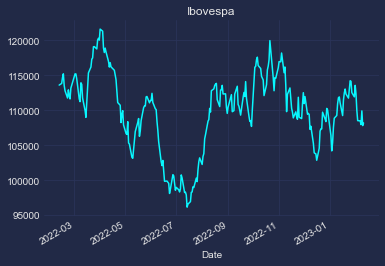

In [19]:
#Fazer os gráficos da performance do último dos ativos
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 400)

plt.show()

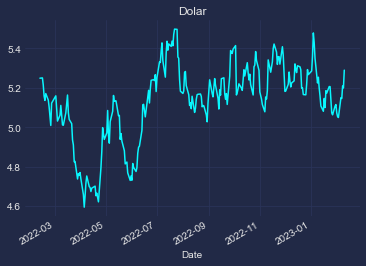

In [20]:
#Fazer os gráficos da performance do último dos ativos
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "dolar", use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 400)

plt.show()

In [23]:
#enviando para o meu email, usando o gmail
def send_email(subject, recipient, body, attachment):
    gmail_user = 'inserir email'
    gmail_password = 'inserir senha'
    
    msg = MIMEMultipart()
    msg['From'] = gmail_user
    msg['To'] = endereçado
    msg['Subject'] = subject
    msg.attach(MIMEText(body))

    with open(attachment, "rb") as f:
        ext = attachment.split('.')[-1]
        attachedfile = MIMEApplication(f.read(),_subtype = ext)
        attachedfile.add_header(
            'content-disposition', 'attachment', filename=attachment)
        msg.attach(attachedfile)

    try:
        server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        server.ehlo()
        server.login(gmail_user, gmail_password)
        server.sendmail(gmail_user, recipient, msg.as_string())
        server.close()
        print ('Email sent!')
    except Exception as e:
        print ('Something went wrong...', e)

def main():
    report = generate_report()
    subject = "Automated Report"
    recipient = "recipient_email@example.com"
    body = "Here is the automated report"
    attachment = "example.xlsx"
    send_email(subject, recipient, body, attachment)

if __name__ == "__main__":
    main()

Something went wrong... (534, b'5.7.9 Application-specific password required. Learn more at\n5.7.9  https://support.google.com/mail/?p=InvalidSecondFactor bg6-20020a056102366600b00411bcfd8c90sm429203vsb.34 - gsmtp')
